# Handling Imbalanced Dataset with MachineLearning !!!

Outliers :- Some observation are far from the many Observations are called outliers.

outliers are some time benificial at some cases (Eg Credit card Fraud Detection).

But Some times outliers are not good at some cases.

#### Which Machine Learning Modelss are sensitive to outliers :-
1. Linear Regression
2. Logistic Regression
3. Kmeans
4. Hierarchical
5. PCA
6. NeuralNetwork
7. DBSCAN

### Machine Learning Models Not Sensitive to outliers :-
1. Naivye Bayes Classifier---
2. Decision Tree Regressor & Classifier
3. Ensemble (RF,XGboost,GB)
4. Support Vector Machine (SVM)
5. KNeighborsClassifier (KNN)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(df)

891

<Figure size 1440x1080 with 0 Axes>

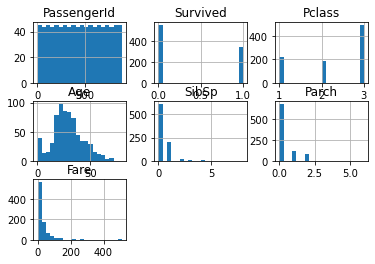

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
df.hist(bins=20);

In [11]:
df["Age"].isna().sum()

177

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

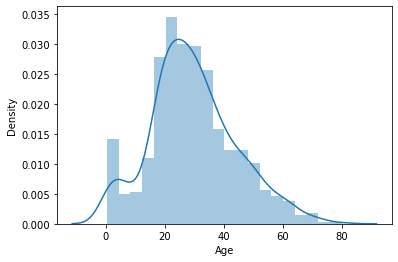

In [12]:
import seaborn as sns

sns.distplot(df["Age"].dropna())

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

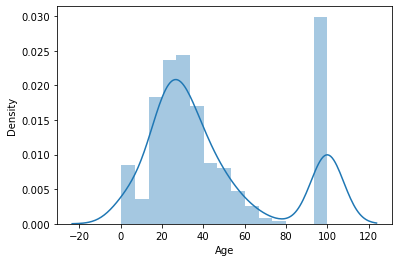

In [13]:
sns.distplot(df["Age"].fillna(100))

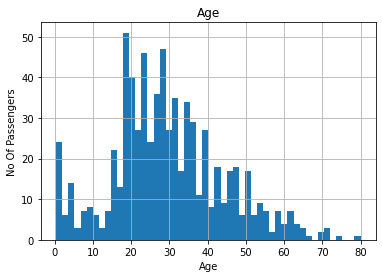

In [14]:
df["Age"].hist(bins=50)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("No Of Passengers")
plt.show()

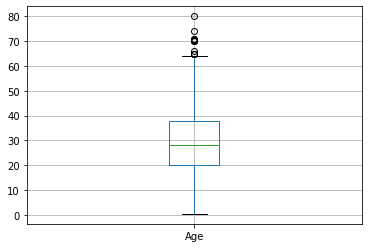

In [18]:
df.boxplot("Age");

In [20]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Assuming that Age is following a gaussian distribution we will calculate the boundries which differentiate the outliers

upper_boundry = df["Age"].mean() + 3*df["Age"].std()
lower_boundry = df["Age"].mean() - 3*df["Age"].std()

upper_boundry,lower_boundry

(73.27860964406095, -13.88037434994331)

In [22]:
### Lets calculate the InterQuartileRange(IQR) range to calculate the boundries

IQR = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)
IQR

17.875

In [25]:
lower_bridge = df["Age"].quantile(0.25)-(IQR*1.5)
upper_bridge = df["Age"].quantile(0.75)+(IQR*1.5)

lower_bridge,upper_bridge

(-6.6875, 64.8125)

In [27]:
# Extreme Outliers multiply IQR by 3

lower_bridge = df["Age"].quantile(0.25)-(IQR*3)
upper_bridge = df["Age"].quantile(0.75)+(IQR*3)

lower_bridge,upper_bridge

(-33.5, 91.625)

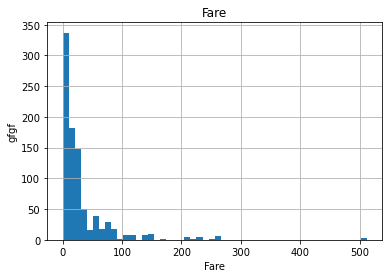

In [92]:
### Feature is skewed we can use IQR to remove outliers.

df["Fare"].hist(bins=50)
plt.title("Fare")
plt.xlabel("Fare")
plt.ylabel("gfgf")
plt.show()

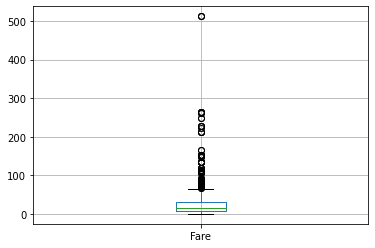

In [29]:
df.boxplot("Fare");

In [30]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
IQR = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
IQR

23.0896

In [32]:
upper_boundry = df["Fare"].quantile(0.75)+(IQR*1.5)
lower_boundry = df["Fare"].quantile(0.25)-(IQR*1.5)
upper_boundry,lower_boundry

(65.6344, -26.724)

In [33]:
#Extreme Outliers multiply IQR by 3
upper_boundry = df["Fare"].quantile(0.75)+(IQR*3)
lower_boundry = df["Fare"].quantile(0.25)-(IQR*3)
upper_boundry,lower_boundry

(100.2688, -61.358399999999996)

In [56]:
# Removing Outliers

data = df.copy()

In [64]:
data.loc[data["Age"]>=73,"Age"] = 73

In [65]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [66]:
data["Age"].isna().sum()

177

In [70]:
data.loc[df["Age"]>=73] = 73
data.loc[df["Fare"]>=100,"Fare"] = 100

In [71]:
data["Fare"].isna().sum()

0

In [72]:
data["Age"].isna().sum()

177

<AxesSubplot:>

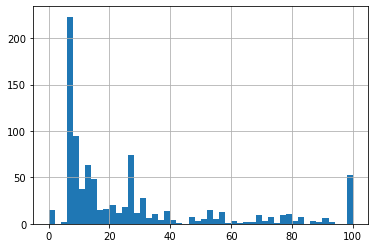

In [75]:
data["Fare"].hist(bins=50)

<AxesSubplot:>

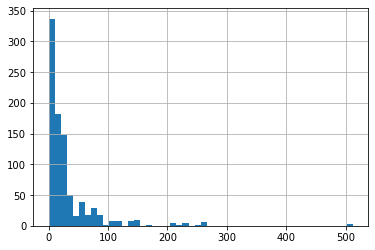

In [76]:
df["Fare"].hist(bins=50)

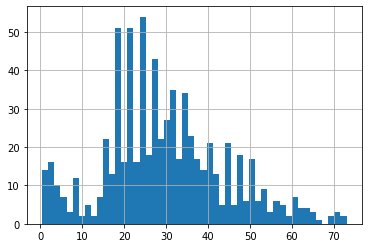

In [77]:
data["Age"].hist(bins=50);

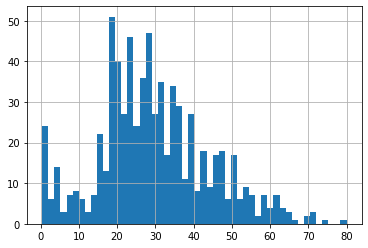

In [78]:
df["Age"].hist(bins=50);

<AxesSubplot:>

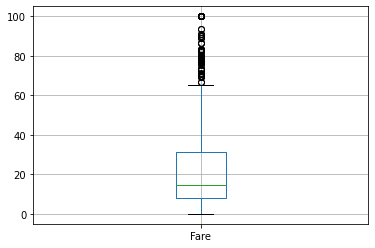

In [81]:
data.boxplot("Fare")

<AxesSubplot:>

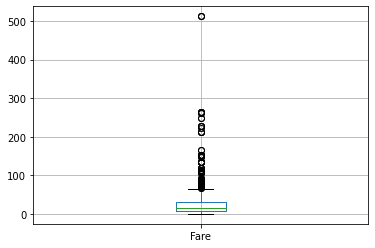

In [82]:
df.boxplot("Fare")

<AxesSubplot:>

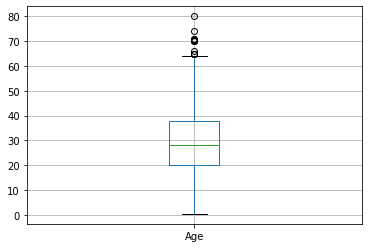

In [84]:
df.boxplot("Age")

<AxesSubplot:>

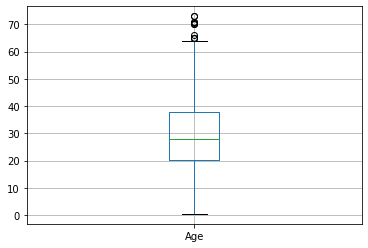

In [85]:
data.boxplot("Age")

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

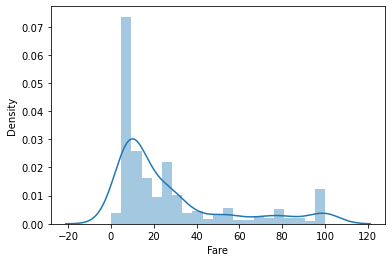

In [90]:
sns.distplot(data["Fare"])

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

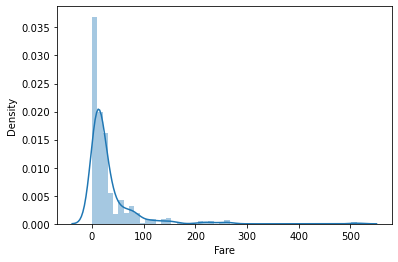

In [91]:
sns.distplot(df["Fare"])

In [93]:
# Making prediction with unSckewed Dataset
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(data[["Age","Fare"]].fillna(0),data["Survived"],test_size=0.2,random_state=42)

In [94]:
# Logistic Regression for unsckewed dataset 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [96]:
y_preds = classifier.predict(X_val)
classifier.score(X_val,y_val)

0.6815642458100558

In [97]:
# Making Prediction with Sckewed Dataset
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(df[["Age","Fare"]].fillna(0),df["Survived"],test_size=0.2,random_state=42)

In [98]:
# Logistic Regression for sckewed dataset 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [99]:
classifier.score(X_val,y_val)

0.6536312849162011